# **0. 개요**

## **가. 패키지 설치 및 라이브러리 호출**

In [ ]:
import warnings
# 불필요한 경고 출력을 방지합니다.
warnings.filterwarnings('ignore')
import subprocess
import sys
import pandas as pd
import numpy as np
import pickle
import hashlib

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("folium")
install("seaborn")
install("xgboost")

In [ ]:
# aidu 사용을 위한..
# SACP AI 포탈과 연계를 위한 기본 객체 생성
from aicentro.session import Session
sacp_session = Session(verify=False)
from aicentro.framework.keras import Keras as SacpFrm
sacp_framework = SacpFrm(session=sacp_session)

## **나. 강의 목차**

[1.데이터 수집](#1.-데이터-수집)  

[2.데이터 전처리](#2.-데이터-전처리)

[3.데이터 시각화](#3.-데이터-시각화)

[4.모델링](#4.-모델링)

# **1. 데이터 수집**

## **가. 데이터 암호화**

In [ ]:
#실습 코드 - 'ansan_data.csv' 파일을 읽어 anssan_data 데이터프레임에 로드하세요.
ansan_data=

In [ ]:
#head()로 상위 5개의 데이터를 살펴봅니다.
ansan_data.head()

※ 이 데이터는 고객을 식별할 수 없도록 사전에 처리를 거쳤습니다.

### **hashlib 을 이용한 데이터 암호화**

※ 도큐먼트: https://docs.python.org/ko/3.10/library/hashlib.html

IS, JOIN_SEQ는 암호화가 필요한 항목입니다.  
학습데이터는 이미 암호화 되어있으나, 암호화 코드를 실행해보면서 방법을 익힙니다.

In [ ]:
#암호화를 위한 함수를 정의합니다.
def encrypt(target):
    hashSHA=hashlib.sha256() #SHA256 해시 객체 생성
    hashSHA.update(str(target).encode('utf-8')) #해시 값 생성 
    return hashSHA.hexdigest().upper() #해시값 반환

In [ ]:
#연습문제 
encrypt('홍길동')

In [ ]:
#실습 코드 - 앞서 만든 encrypt 함수를 적용하여 IS컬럼의 값을 암호화 하세요(.apply 함수를 이용하세요)


In [ ]:
#실습 코드 - 앞서 만든 encrypt 함수를 적용하여 JOIN_SEQ컬럼의 값을 암호화 하세요(.apply 함수를 이용하세요)


값이 암호화 되는 것을  확인할 수 있습니다.

In [ ]:
ansan_data.head()

## **나. 주소에 대한 위경도 좌표 수집**

지도시각화를 위해서는 주소에 대한 좌표가 필요합니다.   
Aidu 환경에서는 api 호출이 불가능하기 때문에 api호출은 실습하지 않습니다.  
api로 수집한 데이터를 간단하게 파싱해보는 것만 실습하겠습니다.

In [ ]:
with open('json_data.pickle', 'rb') as f:
    json_data = pickle.load(f) # 단 한줄씩 읽어옴

In [ ]:
json_data[:10]

<Response [200]> 각각이 json형식을 담고 있습니다.   
.json() 함수로 JSON데이터에 접근이 가능합니다.

아래 결과를 보면 [] 리스트와 {} 딕셔너리로 되어있습니다. 즉, index와 key로 접근이 가능합니다.

In [ ]:
json_data[0].json()

**- 도로명 주소 가져오기**

한단계씩 접근해 봅니다.

In [ ]:
json_data[0].json()['documents']

In [ ]:
json_data[0].json()['documents'][0]

In [ ]:
json_data[0].json()['documents'][0]['road_address']['address_name']

**- 좌표 가져오기**

리스트에서 주소와 경도/위도만 가져와서 데이터프레임으로 만들어 줍니다.

In [ ]:
#실습 코드 - json_data의 첫번째 요소에서 좌표를 출력해보세요


In [ ]:
address_data=pd.DataFrame([])

In [ ]:
#실습 코드 - for문과 if문을 활용하여 도로명 주소와 주소에 대한 좌표를 읽어서 address_data에 저장하세요




In [ ]:
address_data

위와 같이 주소에 대한 좌표를 얻어서 저장할 수 있습니다.

ansan_data의 위경도 좌표는 이렇게 만들어졌습니다.

In [ ]:
ansan_data.iloc[:,-3:]

위와 같이 좌표를 얻어서 BIDW데이터에 붙여주었습니다.  
아래가 최종 수집된 데이터입니다.

In [ ]:
ansan_data.head(3)

※ 컬럼 설명
- DATE : 데이터 생성일자
- IS : 식별번호
- TYPE : 고객 유형
- TYPE_DTL : 상세 분류 코드
- 상세분류2 : 상세 분류 코드 한글명
- JOIN_SEQ: 가입일련번호
- PRODUCT : 상품코드
- PRODUCT_NM : 상품코드 한글명
- JOIN_DATE : 가입일자
- C_PERIOD_DATE : 약정기간
- B_DONG : 법정동
- B_DONG_ADD : 행정구역+법정동
- ROAD_NO : 도로명번호
- ROAD_NM : 도로명
- BUILDING_NM : 건물명
- BUILDING_NO1 : 건물 본번
- BUILDING_NO2 : 건물 부번
- ROAD_NM_ADD : 행정구역+도로명
- CNT : 지표
- F_ADDR : 도로명주소전체
- lon: 경도
- lat: 위도

# **2. 데이터 전처리**

어떤 데이터인지 한번 살펴봅니다.

In [ ]:
ansan_data.info()

## **가.결측값 제거**

JOIN_DATE, lon, lat에 결측치가 존재함을 알수 있습니다.
컬럼별로 아래와 같이 결측치를 처리합니다.

- JOIN_DATE: 사용하지 않을 데이터이므로 열을 지우겠습니다.
- BUILDING_NM : 건물명은 실제로 값이 존재하지 않을 수 있으므로 공란으로 두겠습니다.
- lon, lat : 주소에 좌표가 없는 것은 있을 수 없으므로 해당 행을 삭제하겠습니다. 

### **i) JOIN_DATE 열을 삭제합니다.**

결측치 제거하는 김에 불필요한 컬럼도 함께 삭제하겠습니다.('JOIN_DATE','DATE','C_PERIOD','B_DONG','B_DONG_ADD','ROAD_NM_ADD','CNT')

In [ ]:
#실습 코드 - 'JOIN_DATE','DATE','C_PERIOD','B_DONG','B_DONG_ADD','ROAD_NM_ADD','CNT' 열을 삭제하세요 (.drop()을 사용하세요.)



### **ii) BUILDING_NM 열은 공란으로 둡니다.**

In [ ]:
#실습 코드 - BUILDING_NM 열의 NaN값을 확인합니다. (.isna()를 사용하세요.)


BUILDING_NM에 NaN이 들어가 있는 것이 보입니다. ""로 값을 변경합니다.

In [ ]:
#실습 코드 - NaN을 공란으로 바꿔줍니다. (.fillna()를 사용하세요)


In [ ]:
ansan_data[ansan_data['BUILDING_NM'].isna()]

결측값이 사라졌습니다.

### **iii) lon, lat은 결측값이 있는 행을 삭제합니다.**

In [ ]:
#실습 코드 - 결측값이 있는 행을 삭제합니다.(.dropna() 를 사용하세요)


In [ ]:
ansan_data.info()

이제 모든 결측치가 모두 사라졌습니다.

## **나. 중복 제거**

데이터를 삭제한 경우 중복이 발생할 수 있습니다.

In [ ]:
#실습 코드 - 데이터프레임의 중복을 제거합니다.(dop_duplicates()를 사용하세요)


In [ ]:
ansan_data.info()

중복이 존재하지 않습니다.

## **다. 컬럼명 변경**

한글로된 컬럼명을 영어로 변경합니다.

In [ ]:
#실습 코드 - 상세분류2 --> TYPE_DTL_NM로 컬럼명을 변경합니다.rename 함수를 이용하세요. 입력값은 {변경전컬럼명,변경후컬럼명} 이며, axis=1 옵션을 주어야 합니다.


In [ ]:
ansan_data

## **라.Feature Engineering**

### **i) Domain지식 - 데이터 삭제**

- 059Z-내선전화는 요금을 납부하지 않으며, 모회선에 종속되어 세금계산서 발급 대상이 아니므로 제외합니다.

In [ ]:
#실습 코드 PRODUCT가 '059Z'인 데이터를 삭제합니다.


### **ii) Domain지식 - 데이터 수정**

- 유형별 데이터를 살펴봅니다.

In [ ]:
#실습 코드 - TYPE과 TYPE_DTL을 .groupby() 함수를 이용해서 살펴봅니다. > count() 사용


- TYPE은 개인/개인사업자/공공기관/기타/법인사업자/정식단체로 분류되는데, 공공기관/기타/법인사업자/정식단체는 구분하는 것이 의미가 없으므로 "법인"으로 통합합니다.

In [ ]:
ansan_data.loc[(ansan_data['TYPE']=='공공기관')|
               (ansan_data['TYPE']=='기타') |
               (ansan_data['TYPE']=='법인사업자')|
               (ansan_data['TYPE']=='정식단체'),'TYPE'] = '법인'

- 명의자(TYPE)는 개인이지만, 실제로는 사업자가 연결되어있을 수 있습니다. 고객세부유형을 보면, 가치/AM/CORE/법인은 실제로는 사업자일 것입니다.  실제 데이터를 살펴보면, "가치"는 개인사업자이고, AM/CORE도 기업의 입점업체이거나, 지점으로 개인사업자일 것으로 보이므로, 해당 건들을 전부 개인사업자로 변경하겠습니다.

※고객 세부유형의 의미: MASS(일반개인고객)/ 가치(소상공인) / AM(대기업) /CORE(중견기업) / 법인(미분류 법인)

In [ ]:
#실습 코드 - 앞의 코드를 차모하여 TYPE이 '개인'이면서 TYPE_DTL_NM이 'AM','CORE','가치','법인'인 경우 '개인사업자'로 변경해줍니다.



- TYPE_DTL_NM 이 **ㆍ값없음** 인 경우도 살펴보겠습니다.  
BUILDING_NM을 보니 개인사업자입니다. 개인사업자로 변경하겠습니다.

In [ ]:
ansan_data.loc[ansan_data['TYPE_DTL_NM']=='ㆍ값없음']

In [ ]:
#실습 코드 - TYPE이 '개인'이면서 TYPE_DTL_NM이 '값없음'인 경우 개인사업자로 변경합니다.


- 삭제된 데이터가 있으니 index를 리셋합니다.

In [ ]:
#실습 코드 - index를 리셋하세요


- 전처리가 완료되었습니다.

In [ ]:
ansan_data.groupby('TYPE')['IS'].count()

## **마.데이터 저장**

In [ ]:
#실습 코드 - to_csv 함수를 이용하여 ansan_data 를 'ansan_data_pre.csv' 파일로 저장합니다.


# **3. 데이터 시각화**

## **가. Seaborn Barplot을 통한 탐색**

- seaborn으로 barplot을 그려서 상품의 분포를 탐색해보겠습니다.

### **i) 한글 폰트 설정**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.font_manager as fm

어떤 폰트가 설치되어있는지 확인합니다.

In [ ]:
fm.get_fontconfig_fonts()

NanumGothicCoding이라는 폰트를 쓰겠습니다.

In [ ]:
plt.rc('font',family = 'NanumGothicCoding')

캔버스 사이즈도 키워줍니다.

In [ ]:
plt.rcParams["figure.figsize"]=(12,9)

### **ii) barplot**

- 고객유형과 상품별로 groupby를 해봅니다.

In [ ]:
#실습 코드 - TYPE과 PRODUCT_NM기준으로 groupby 하고, type과 product 값 기준으로 내림차순 정렬(sort_values), index는 리셋 하세요(reset_index)
prod_stat=pd.DataFrame(                     ,ascending=False).reset_index()
prod_stat

- 고객/상품별 건수가 컬럼명이 PRODUCT이니 혼동이 옵니다. 컬럼명을 변경해주겠습니다.

In [ ]:
prod_stat = prod_stat.rename(columns={'PRODUCT':'CNT'})
prod_stat

- 고객 유형별 많이 사용하는 상품을 내림차순으로 보았지만, 고객유형별로 전체에서 차지하는 비중이 다르기 때문에 시각화해서 보면 좀더 나을 것 같습니다.  
각 고객유형별로 상품의 분포를 barplot으로 그려서 살펴보겠습니다.

※ 도큐먼트: https://seaborn.pydata.org/generated/seaborn.barplot.html

- **seaborn.barplot Parameters**  
 **x, y**: x축, y축이 되는 feature를 넣어줍니다.  
 **data** : 그래프를 그릴 데이터

- **subplot(m,n,p)**: m행 n열로 그래프를 배치합니다. p는 mxn 그리드 중 현재 그리는 그래프의 위치를 의미합니다. 

In [ ]:
#실습 코드 - x축은 PRODUCT_NM, y축은 CNT가 되도록 개인, 개인사업자, 법인에 대하여 barplot 그래프를 그리세요.







plt.show()

상품이 매우 많다는 것만 알겠습니다. 조금씩 고쳐보겠습니다.

### **iii) 상품 통합**

상품이 너무 많으니, 비중이 작은 상품을 하나로 묶어서 "기타 상품"으로 처리하겠습니다.

상품명을 기타함수로 변경하는 함수를 정의합니다.

In [ ]:
#대상이 되는 Dataframe과 기타상품을 구분하는 임계값을 입력으로 받습니다.
def etctoetc(df,threshold):
    total_cnt = df['CNT'].sum()
    cnt=0
    for n in df.index:
        cnt=cnt+df.loc[n,'CNT'] #루프를 돌때마다 cnt의 값을 PRODUCT만큼 증가시킴
        if(cnt > total_cnt*threshold): #cnt의 값이 total_cnt*threshold보다 크면
            df.loc[n:,'PRODUCT_NM'] = '기타상품' #n번 인덱스 이후의 PRODUCT_NM을 '기타상품'으로 상품명을 변경
            break 
    #기타상품으로 변경된 상품을 하나로 합쳐줌        
    df = pd.DataFrame(df.groupby(['TYPE','PRODUCT_NM'])['CNT'].sum()).reset_index()
    #데이터를 정렬할 때 기타상품이 가장 뒤에 오도록 수정   
    df2 = df.loc[df['PRODUCT_NM']=='기타상품',:]    
    df3 = df.loc[df['PRODUCT_NM']!='기타상품',:].sort_values(by=['CNT'], ascending=False)    
    df4= pd.concat([df3,df2],sort=False).reset_index(drop=True)
        
    return df4

위 함수를 적용해서 다시 그려보겠습니다.

In [ ]:
#실습 코드 - x축은 PRODUCT_NM, y축은 CNT가 되도록 개인, 개인사업자, 법인에 대하여 barplot 그래프를 그리세요.




    
plt.show()

### **iv) 그래프 수정**

- 상품명이 겹쳐보입니다. 이럴 때는 가로 그래프로 그리면 됩니다.
- 간격이 좁습니다. 조금 그래프를 키우겠습니다.
- title 추가합니다.

In [ ]:
#실습 코드 - y축은 PRODUCT_NM, x축은 CNT가 되도록 개인, 개인사업자, 법인에 대하여 barplot 그래프를 그리세요.
plt.rcParams["figure.figsize"]=(12,15)




plt.show()

**개인은 Mass상품, 개인사업자는 Biz 상품과 Mass상품 혼용, 법인은 Biz 상품 위주로 사용하여  
고객유형 별로 사용하는 상품에 차이가 있음을 확인할 수 있습니다.**

## **나. Folium을 이용한 지도시각화**

이제 우리가 가진 데이터를 지도위에 올려보겠습니다.   

### **i) Folium 기초**

※도큐먼트: https://python-visualization.github.io/folium/

일단 지도를 불러와야 합니다.  
지도는 folium 패키지를 사용하여 불러오겠습니다. (google/kakao/naver/공공 API에서 지도를 불러올 수도 있겠지만, Aidu에서 외부연동이 불가능합니다.)

In [ ]:
import folium

지도의 중심점을 위경도 좌표로 지정하고, 지도의 배율을 지정하겠습니다. (작을 수록 저배율)
우리가 가진 데이터의 기술통계를 살펴보고, 위도(lat)와 경도(lon)의 평균값을 지도의 중심점으로 삼고, 지도의 배율은 14로 하겠습니다.

In [ ]:
ansan_data.describe()

- 아래와 같이 지도의 중심점을 설정하면, 안산시 단원구 지도가 나오는 것을 볼수 있습니다.

In [ ]:
f_lon=126.813232
f_lat=37.318579

**Parameters**  
**location**(tuple or list, default None) – 위도, 경도로 지도의 중심점을 지정합니다.

**zoom_start** (int, default 10) – 지도의 배율 지정, 숫자가 커질수록 배율이 낮음

In [ ]:
#실습 코드 - 지도를 그리세요
map = 
map

folium 패키지는 기존적으로 Open Street Map 기반이지만, Stamen Terrain’, ‘Stamen Toner’, ‘Mapbox Bright’, 와 ‘Mapbox Control room tiles’ 형식을 지정할 수 있습니다.

(Mapbox 의 경우에는 API key가 필요)

In [ ]:
map_ST = folium.Map(location=[f_lat,f_lon], zoom_start=14, tiles='Stamen Terrain')

In [ ]:
map_ST

### **ii) 지도위에 데이터 올리기**

우리는 다양한 지도중에서도 HeatMap을 사용합니다.  
Heatmap은 아래와 같이 데이터의 밀도와 분포를 표현하는데 적합합니다.

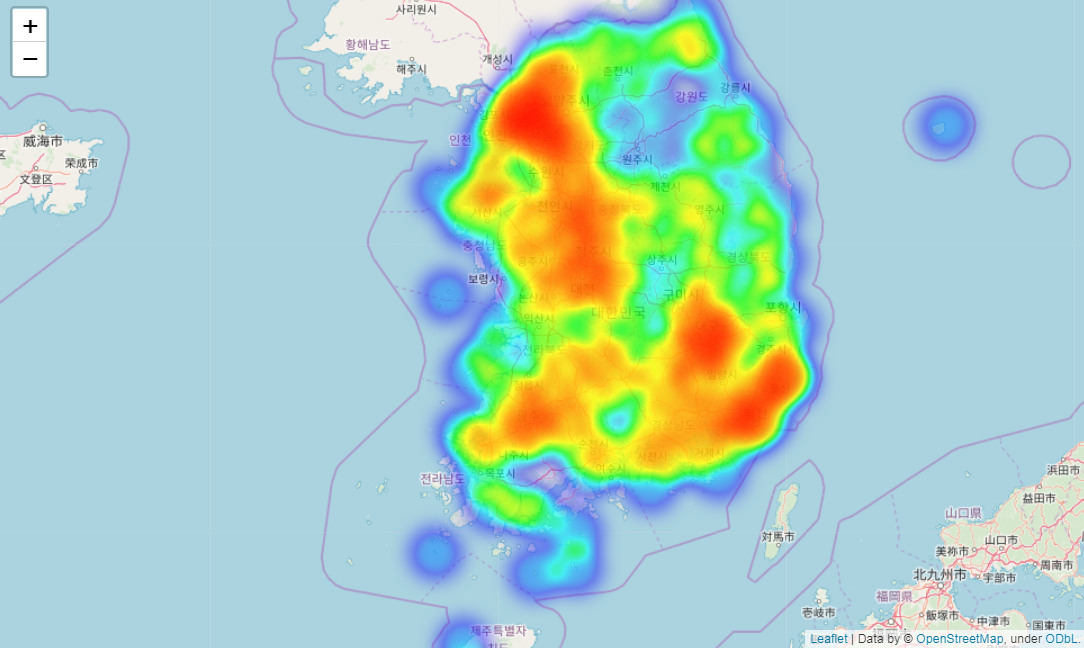

In [ ]:
from folium.plugins import HeatMap

개인/개인사업자/법인으로 구분합니다.

In [ ]:
ansan_map_1=ansan_data.loc[ansan_data['TYPE']=='개인',:]
ansan_map_2=ansan_data.loc[ansan_data['TYPE']=='개인사업자',:]
ansan_map_3=ansan_data.loc[ansan_data['TYPE']=='법인',:]

**Parameter**  
**data (list of points of the form [lat, lng] or [lat, lng, weight])** - numpy.array 또는 list로 입력    
**min_opacity (default 1.)** – 불투명도     
**max_zoom (default 18)** – 최대 밀도에 도달하는 Zoom 레벨    
**radius (int, default 25)** – 포인트의 반경  

- 개인의 분포를 확인합니다.

In [ ]:
heat_data=np.array([ansan_map_1['lat'],ansan_map_1['lon']])
heat_data=heat_data.transpose()

map = folium.Map(location=[f_lat,f_lon], zoom_start=13)
HeatMap(heat_data,min_opacity=0.2,max_val=1,max_zoom=25,radius=25).add_to(map)

In [ ]:
map

개인은 아파트단지 등 주택지역에 많이 분포하는 것을 볼수 있습니다.

- 개인사업자의 분포를 확인합니다

In [ ]:
#실습 코드 - 개인에 대해 지도에 heatmap을 그렸던 코드를 참고하여 개인사업자의 데이터를 만듭니다.
heat_data = np.array([ansan_map_2['lat'],ansan_map_2['lon']])
heat_data=heat_data.transpose()

In [ ]:
#실습 코드 - 개인에 대해 지도에 heatmap을 그렸던 코드를 참고하여 개인사업자의 분포를 표시합니다.
map = folium.Map(location=[37.318879,126.807162], zoom_start=13)
HeatMap(heat_data,min_opacity=0.2,max_val=1,max_zoom=25,radius=25).add_to(map)

In [ ]:
map

- 법인의 분포를 확인합니다

In [ ]:
#실습 코드 - 개인에 대해 지도에 heatmap을 그렸던 코드를 참고하여 법인의 데이터를 만듭니다.

heat_data = np.array([ansan_map_3['lat'],ansan_map_3['lon']])
heat_data=heat_data.transpose()

In [ ]:
#실습 코드 - 개인에 대해 지도에 heatmap을 그렸던 코드를 참고하여 법인의 분포를 표시합니다.

map = folium.Map(location=[f_lat,f_lon], zoom_start=13)
HeatMap(heat_data,min_opacity=0.2,max_val=1,max_zoom=25,radius=25).add_to(map)

In [ ]:
map

법인은 공단쪽에 밀도가 높은 것을 볼수 있습니다.

# **4. 모델링**

## **가. Train/Test 데이터 분할**

학습에 사용할 데이터만 남기겠습니다.

In [ ]:
ansan_data_T=ansan_data.loc[:,['TYPE','PRODUCT_NM','ROAD_NM','BUILDING_NO1','BUILDING_NO2']]
ansan_data_T.head()

데이터를 학습에 사용할 데이터와 예측을 위한 데이터로 나누겠습니다.   
데이터를 분할 할 때는 Pandas의 sample함수를 이용해서 Train 셋과 Test 셋을 9:1로 분리하겠습니다.

※ 원칙적으로 학습에 사용할 데이터와 예측을 위한 데이터는 전처리 전에 분리해야 합니다.  
강의에서 전처리 후에 데이터를 분할한 것은 학습의 편의를 위해서입니다.

In [ ]:
ansan_data

In [ ]:
#Train set의 크기 계산
N=int(len(ansan_data_T) * 0.9)

In [ ]:
#sample 함수를 이용해 Train_set을 분리하여 저장
train_data=ansan_data_T.sample(n=N)

In [ ]:
#Train_set을 제외한 나머지를 Test_set으로 저장
test_data=ansan_data_T.drop(ansan_data_T.index[train_data.index])

- Aidu ez에서 사용할 데이터도 저장해줍니다.

In [ ]:
#SAVE
train_data.to_csv('ansan_train.csv',header=True, index=False, encoding='utf-8')
test_data.to_csv('ansan_test.csv',header=True, index=False, encoding='utf-8')

In [ ]:
#LOAD
train_data=pd.read_csv('ansan_train.csv')
test_data=pd.read_csv('ansan_test.csv')

## **나. Label Encoding**

문자로된 범주형 컬럼들을 숫자로 변경합니다.  

### **i) Label Encoding 대상 추출 및 변환**

In [ ]:
#Label Encoding 대상 컬럼 지정
le_columns=train_data.columns

In [ ]:
le_columns

범주형 데이터의 범주에 변경이 발생하는 경우가 있습니다.   
이런 경우에는 아래와 같이 예외처리를 해주어야 합니다.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# #실습 코드 - LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 




In [ ]:
train_data.shape, test_data.shape

※ 모델링 과정에서 Tree 계열 모델을 사용하기 때문에, 교육 중에 One-Hot Encoding은 진행하지 않습니다.  
범주형 데이터의 범주가 많은 경우 Tree 계열 모델의 학습속도가 느립니다.  


Label Encoding한 데이터를 구분해서 저장합니다.

In [ ]:
train_data_le = train_data
test_data_le = test_data

### **ii) 인코딩 완료된 데이터 저장**

Label Encoding 데이터 SAVE/LOAD

In [ ]:
#SAVE
train_data_le.to_csv('ansan_train_le.csv', header=True, index=False, encoding='utf-8')
test_data_le.to_csv('ansan_test_le.csv', header=True, index=False, encoding='utf-8')

In [ ]:
#LOAD
train_data_le=pd.read_csv('ansan_train_le.csv')
test_data_le=pd.read_csv('ansan_test_le.csv')

In [ ]:
train_data_le.shape

In [ ]:
train_data_le

## **다. Train data와 Validation data 분할**

Label Encoding 데이터 분할

- train vs validation 데이터 분리 (feature label 분리)

**test_size**: test_size의 크기  
**random_state**: random_state를 동일하게 유지해야 일정한 데이터가 나옴  
**stratify**: label을 균등하게 분포하도록 함  

In [ ]:
#실습 코드 사이킷런의 train_test_split로 데이터를 train셋과 validation셋으로 분리하세요.



x_train_le.shape, x_val_le.shape, y_train_le.shape, y_val_le.shape

- test 데이터 feature label 분리

In [ ]:
x_test_le=test_data_le.iloc[:,1:]
y_test_le=test_data_le.iloc[:,0]

## **라. 알고리즘 별 학습과 검증**

### **※ 모델별 성능을 저장하기 위한 함수 선언**

아래 함수는 외우실 필요없이 저장해두고 Copy 해서 사용하시면 됩니다.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]


#acc를 구해서 시각화해줌
def acc_eval(name_, pred, actual):
    global predictions
    global colors

    acc = (pred==actual).mean()
    my_predictions[name_] = acc


    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=False)  # 정확도 내림차순으로 sort
    
    df = pd.DataFrame(y_value, columns=['model', 'acc'])
    #print(df)
    min_ = df['acc'].min() -0.5
    max_ = 1.2
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['acc'])
    
    for i, v in enumerate(df['acc']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v+0.1, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('Accuracy', fontsize=18)
    plt.xlim(min_,max_)
    
    plt.show()
    
#실수로 잘못 넣은 경우 해당 모델을 삭제
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

#출처: 패스트캠퍼스-직장인을위한 파이썬 데이터분석(이경록) 발췌

### **i) Decision Tree**

※도큐먼트: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**Parameter**  
**min_samples_split** : 내부 노드를 분할하는데 필요한 최소 샘플 수 (작을 수록 과적합 가능성이 큼)  
**min_samples_leaf**: 리프노드의 최소 샘플 수 (작을 수록 과적합 가능성이 큼)  
**max_features** : 최상의 분할을 찾을 때 고려할 기능의 수  
**max_depth** : 트리의 최대 깊이  
**max_leaf_nodes** : 리프노드의 개수

**Step 0. 라이브러리 로딩**

In [ ]:
#실습 코드 - sklearn의 DecisionTreeClassifier를 로딩합니다.


**Step 1. 모델 생성**

In [ ]:
#실습 코드 - 모델을 생성합니다. 파라미터 수정
model_dt = DecisionTreeClassifier(min_samples_split=    ,
                                  min_samples_leaf=    ,
                                  max_features=     ,
                                  max_depth=     ,
                                  max_leaf_nodes=
                                 )

**Step 2. 모델 학습**

In [ ]:
#실습 코드 - 모델을 학습합니다.
model_dt.

**Step 3. 결과 검증**

In [ ]:
#실습 코드 - 결과를 예측합니다. 
pred_dt=model_dt.

In [ ]:
#acc_eval로 결과를 시각화 합니다.
acc_eval('Decision Tree',pred_dt,y_test_le)

**Step 4. Tree의 구조 확인**

https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

In [ ]:
n_nodes = model_dt.tree_.node_count
children_left = model_dt.tree_.children_left
children_right = model_dt.tree_.children_right
feature = model_dt.tree_.feature
threshold = model_dt.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))

### **iii) Random Forest**

※도큐먼트: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

**Parameter**  
**n_estimators**: 결정트리의 수 (bagging에 들어가는 트리의 수)  
**min_samples_split** : 내부 노드를 분할하는데 필요한 최소 샘플 수 (작을 수록 과적합 가능성이 큼)  
**min_samples_leaf**: 리프노드의 최소 샘플 수 (작을 수록 과적합 가능성이 큼)  
**max_features** : 최상의 분할을 찾을 때 고려할 기능의 수  
**max_depth** : 트리의 최대 깊이  
**max_leaf_nodes** : 리프노드의 개수

**Step 0. 라이브러리 로딩**

In [ ]:
#실습 코드 - sklearn에서 RandomForestClassifier를 로드합니다.


**Step 1. 모델 생성**

In [ ]:
#실습 코드 - 모델을 생성하고, 파라미터를 설정합니다.
model_rf= RandomForestClassifier(n_jobs=-1,n_estimators=   ,
                                 min_samples_split=   ,
                                 min_samples_leaf=   ,
                                 max_features=   ,
                                 max_depth=   ,
                                 max_leaf_nodes=   )

**Step 2. 모델 학습**

In [ ]:
#실습 코드 - 학습을 진행합니다.
model_rf.

**Step 3. 결과 검증**

In [ ]:
#실습 코드  - 결과를 예측합니다. 
pred_rf=model_rf.

In [ ]:
#결과를 시각화 합니다.
acc_eval('Random Forest',pred_rf,y_test_le) #기본

### **iv) XGBoost**

**Step 0. 라이브러리 로딩**

In [ ]:
install("xgboost")

In [ ]:
#실습코드 - xgboost를 불러옵니다.


**Step 1. 모델 생성**

In [ ]:
#실습코드 - 모델을 생성합니다. 학습파라미터는 따로 설정하겠습니다.
model_xgb = xgb.XGBClassifier()

**Step 2. 모델 학습**

  **- sklearn 래퍼 xgboost 적용**

sklearn의 기본 estimator를 이용해 만들어져 앞서 공부한 알고리즘과 사용법이 동일합니다.  
그러나, 이 경우 xgboost 학습 성능이 느리기 때문에, 학습이 오래 걸리는 경우에는 사용하기 어렵습니다.

  **- python 래퍼 xgboost 적용**

sklearn을 통하지 않고, 직접 호출을 하면 성능이 더 좋습니다.
이 경우에는 xgboost 공유의 데이터형식인 DMatrix로 변환해주어야 합니다.

In [ ]:
#실습 코드 dtrain을 참고해서 validation과 test 데이터도 생성합니다.
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=x_train_le, label = y_train_le)
dval = 
dtest = 

**1. Tree Boost Parameter**  
- **eta**: learning rate  
- **num_boost_around**: 생성할 weak learner의 수  
- **min_child_weight**: 관측치에 대한 가중치 합의 최소로 과적합 조절 용도 (값이 크면 과적합이 감소)  
- **gamma**:리프 노드에서 추가분할을 만드는데 필요한 최소 손실감소 값(값이 크면 과적합이 감소)  
- **max_depth**:Tree 의 최대 깊이(너무 크면 과적합)  
- **sub_sample**:훈련 중 데이터 샘플링 비율 지정(과적합 제어)  
- **colsample_bytree**: 열의 서브 샘플링 비율  

**2. Learning Task Parameter**  
- **objective**  
        reg:linear : 회귀  
        binary:logistic : 이진분류  
        multi:softmax : 다중분류, 클래스 반환  
        multi:softprob : 다중분류, 확률 반환  
- **eval_metric**
        rmse : Root Mean Squared Error<br>
        mae : mean absolute error<br>
        logloss : Negative log-likelihood<br>
        error : binary classification error rate<br>
        merror : multiclass classification error rate<br>
        mlogloss: Multiclass logloss<br>
        auc: Area Under Curve<br>     

In [ ]:
#실습 코드 - 파라미터를 설정합니다.
params = {'eta' :   ,
          'max_depth' :   ,
          'min_child_weight':  ,
          'gamma':  ,
          'subsample':  ,
          'colsample_bytree':  ,
         'objective':    ,
         'eval_metric':    ,
         'num_class':  }


early_stopping_rounds 옵션은 XGBoost의 파라미터가 아니고 학습 수행시의 파라미터이므로 XGBClassifier()가 아니라 train()안에 넣어주어야 합니다.  
안그러면 아래와 같은 warning이 나오면서 옵션이 사용되지 않습니다.  
Parameters: { early_stopping_rounds } might not be used.

In [ ]:
import time
start=time.time()

In [ ]:
#실습 코드
# train 데이터 세트는 'train', validation 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dval,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
model_xgb = xgb.train(params =    , dtrain=    , num_boost_round=   , evals=    , early_stopping_rounds=  ,)

In [ ]:
(time.time()-start)/60

**Step 3. 결과 검증**

In [ ]:
#실습 코드 - 결과 예측
pred_xgb=model_xgb.

In [ ]:
#결과 시각화
acc_eval('XGBoost',pred_xgb,y_test_le) #기본

## **마. 평가지표 활용** 

### **i) Confusion Matrix**

Aidu에서 제공하는 Confusion Matrix를 이용합니다.

In [ ]:
y_true=np.array(y_test_le)
y_pred=pred_xgb
y_label=['개인','개인사업자','법인']

In [ ]:
#실습 코드
# Confusion Matrix
sacp_framework.plot_confusion_matrix(
    y_true=      , # Label(Y) 의 정답 (numpy.array)
    y_pred=      , # Label(Y) 의 예측결과 (numpy.array)
    target_names=      , # Label(Y) 의 이름 (array)
    title='Confusion Matrix', # matplotlib 객체의 타이틀 (옵션)
    cmap=None, # matplotlib 의 컬러맵 plt.get_cmap('Greys') ( 기본값 : None )
    normalize=False # 결과 값 Normalize 여부 ( 기본값 : True )
)

### **ii) Accuracy/Presision/recall/f1_score**

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score
def metric_func(actual,pred):
    print("accuracy_score:",accuracy_score(actual,pred))
    print("precision_score:",precision_score(actual,pred,average=None))
    print("recall_score:",recall_score(actual,pred,average=None))
    print("f1_score:",f1_score(actual,pred,average=None))

In [ ]:
metric_func(y_test_le,pred_xgb)

### **iii) ROC Curve & AUC**

In [ ]:
# ROC Curve
# 단 y_true , y_pred 는 n_classes 갯수 만큼
#One-Hot 인코딩 된 상태의 2 차원 이상으로 구성되어야 함
sacp_framework.plot_roc_curve(
    # Label(Y) 의 정답 (numpy.array)
    y_true=pd.get_dummies(y_true).to_numpy(),
    # Label(Y) 의 예측결과 (numpy.array)
    y_pred=pd.get_dummies(y_pred).to_numpy(), 
    n_classes=len(y_label), # Label(Y) 의 이름 갯수
    target_names=y_label, # Label(Y) 의 이름 (array)
    title='ROC Curve' # matplotlib 객체의 타이틀 (옵션)
)

ROC Curve는 개인/개인사업자/법인의 예측 확률을 Threshold로 사용하기 때문에
원핫 벡터 형태의 데이터를 넣으면 그림처럼 각이 생기게 됩니다.

그래서 predict_proba를 쓰면 확률로 표시되는 값을 얻을 수 있고, 이 값을 이용하면 동일한 결과를 얻을 수 있습니다.

In [ ]:
#실습 코드 - output_margin=True 옵션을 넣어 예측합니다.



In [ ]:
# ROC Curve
# 단 y_true , y_pred 는 n_classes 갯수 만큼
#One-Hot 인코딩 된 상태의 2 차원 이상으로 구성되어야 함
sacp_framework.plot_roc_curve(
    # Label(Y) 의 정답 (numpy.array)
    
    # Label(Y) 의 예측결과 (numpy.array)
    y_pred=             , 
    n_classes=            , # Label(Y) 의 이름 갯수
    target_names=       , # Label(Y) 의 이름 (array)
    title='ROC Curve' # matplotlib 객체의 타이틀 (옵션)
)

좀더 부드러운 곡선의 ROC Curve를 얻었습니다.

# **이것으로 실습을 마치겠습니다. 수고하셨습니다!!!!!**